# Compare Result Equity 

## Import Library

In [1]:
import sys
sys.path.append('../../')

In [2]:
import datetime as dt
from dateutil.relativedelta import relativedelta
import os
import pandas as pd
# import pandas_datareader as pdr
import numpy as np
import quantstats as qs
from config.constants import *
from util.plot_equity import plot_equity_trades
import matplotlib.pyplot as plt
from util.load_data import load_data

## Load result strategy

In [3]:
strategy = {}

### Data XAUUSD

In [4]:
XAUUSD = load_data()

###  BRENTCMDUSD

In [9]:
BRENTCMDUSD = {}
file = 'BRENTCMDUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [10]:
BRENTCMDUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
BRENTCMDUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
BRENTCMDUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
BRENTCMDUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

In [11]:
strategy['XAUUSD_BRENTCMDUSD'] = BRENTCMDUSD

###  XAGUSD

In [12]:
XAGUSD = {}
file = 'XAGUSD'
folder = 'Kalman Filter'
Main_folder = 'Pairs_Trading'
Sub_folder = 'Backtest'

In [13]:
XAGUSD['D1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_D1.csv', index_col='Time', parse_dates=True)
XAGUSD['H4'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H4.csv', index_col='Time', parse_dates=True)
XAGUSD['H1'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_H1.csv', index_col='Time', parse_dates=True)
XAGUSD['M30'] = pd.read_csv(
    f'../../out/{Main_folder}/{folder}/{Sub_folder}/{file}_M30.csv', index_col='Time', parse_dates=True)

In [14]:
strategy['XAUUSD_XAGUSD'] = XAGUSD

### Buy and Hold

In [15]:
benchmark = {}

In [16]:
benchmark['D1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_D1.csv', index_col='Time', parse_dates=True)
benchmark['H4'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H4.csv', index_col='Time', parse_dates=True)
benchmark['H1'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_H1.csv', index_col='Time', parse_dates=True)
benchmark['M30'] = pd.read_csv(
    '../../out/Technical_Strategy/Buy_and_Hold/Backtest/result_M30.csv', index_col='Time', parse_dates=True)

In [17]:
strategy['Buy and Hold'] = benchmark

## Shown Result

### TF D1

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2013-05-27   2013-05-27
End Period                 2023-03-01   2023-03-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          4.19%        -3.45%
CAGR﹪                     0.29%        -0.25%

Sharpe                     0.22         -0.1
Prob. Sharpe Ratio         75.52%       37.81%
Smart Sharpe               0.22         -0.1
Sortino                    0.3          -0.14
Smart Sortino              0.3          -0.14
Sortino/√2                 0.22         -0.1
Smart Sortino/√2           0.22         -0.1
Omega                      0.98         0.98

Max Drawdown               -3.87%       -9.91%
Longest DD Days            2124         2417
Volatility (ann.)          1.96%        3.09%
R^2                        0.0          0.0
Information Ratio          -0.01        -0.01
Calmar            

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-08-07,2022-06-13,2023-03-01,937,-9.914904,-9.535997
2,2013-12-24,2016-08-02,2020-08-05,2417,-8.387000,-7.866906
3,2013-07-08,2013-08-26,2013-11-20,136,-1.456708,-1.380488
4,2013-12-04,2013-12-10,2013-12-18,15,-0.667683,-0.592113
5,2013-05-29,2013-05-30,2013-06-06,9,-0.560711,-0.539294


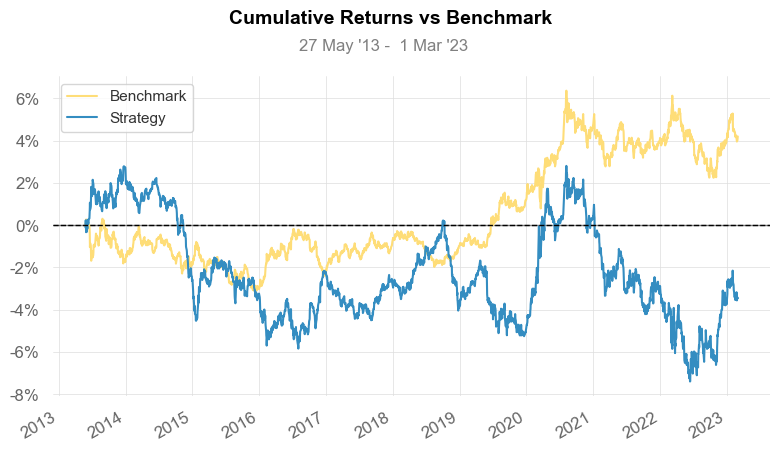

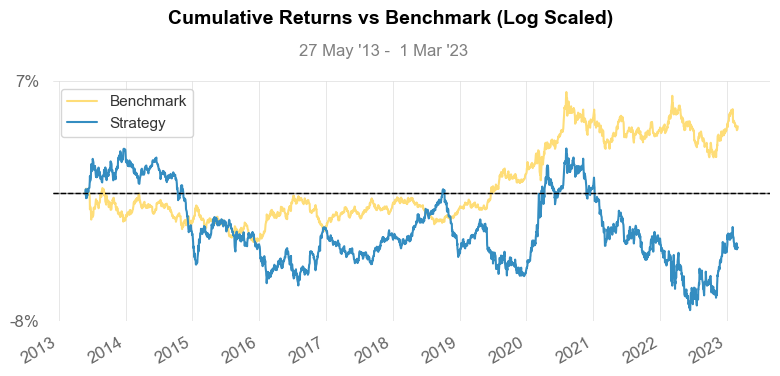

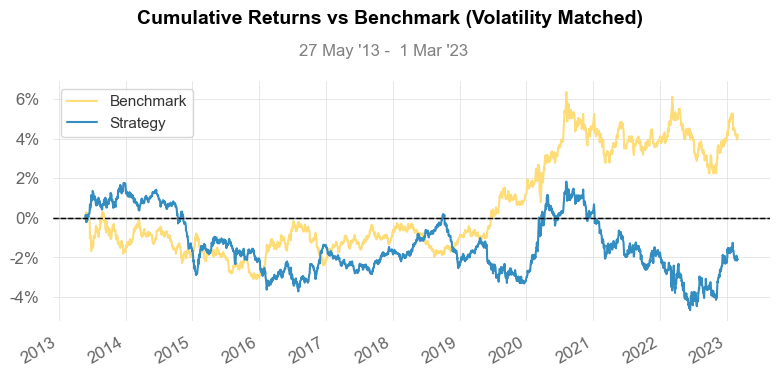

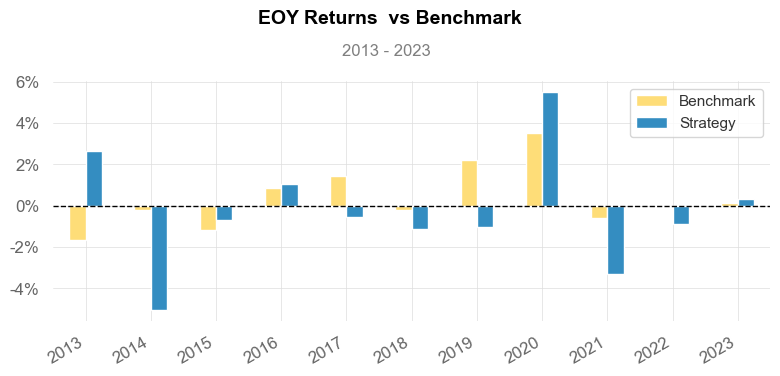

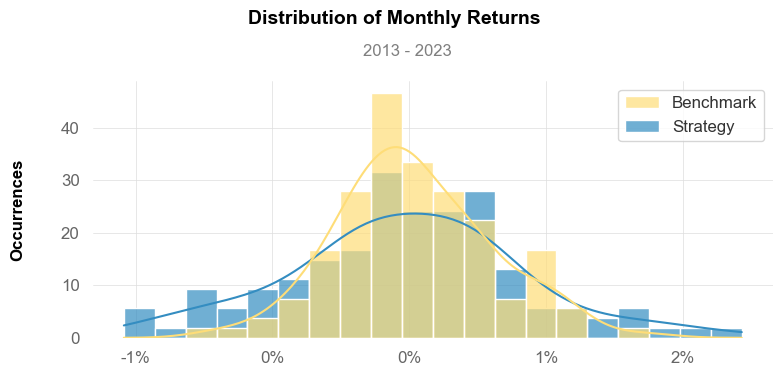

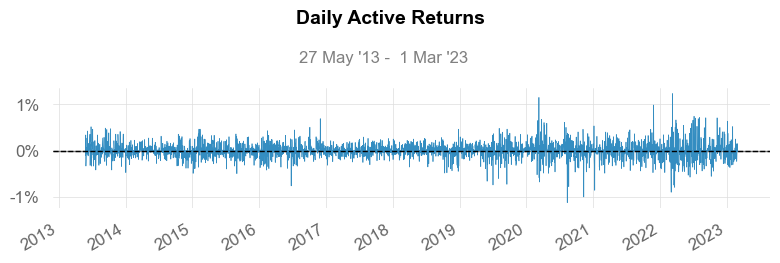

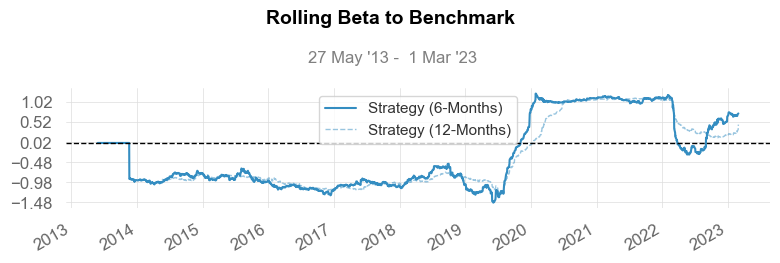

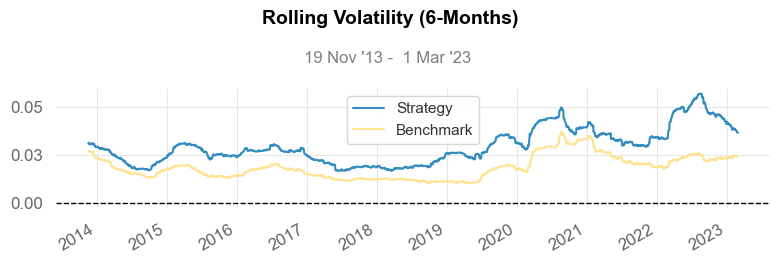

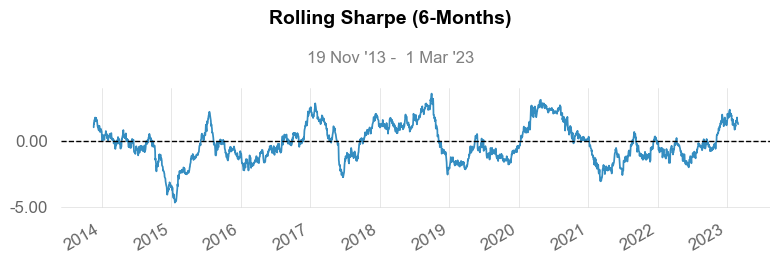

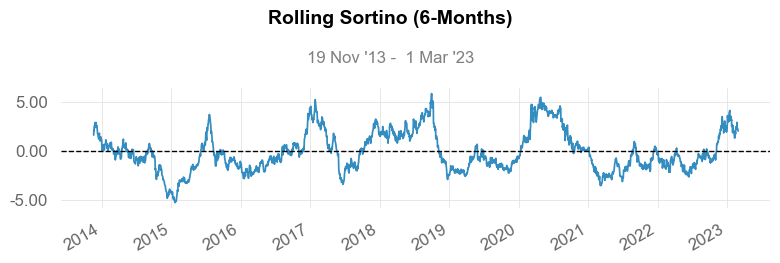

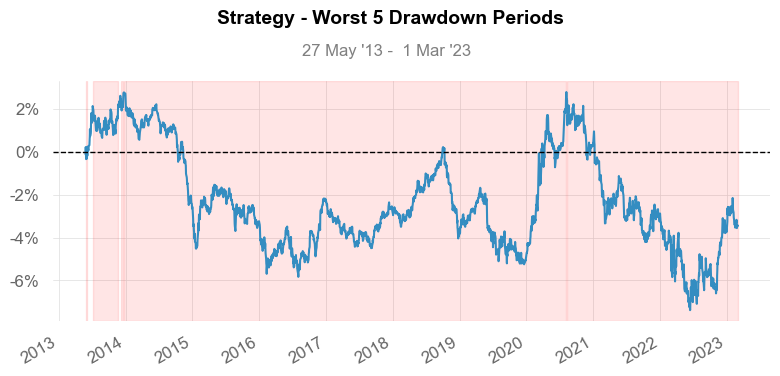

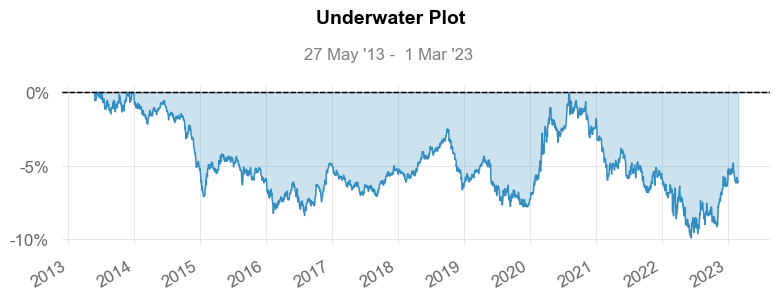

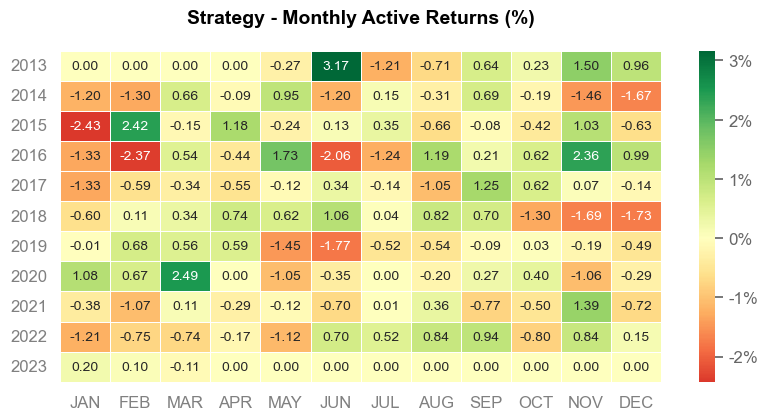

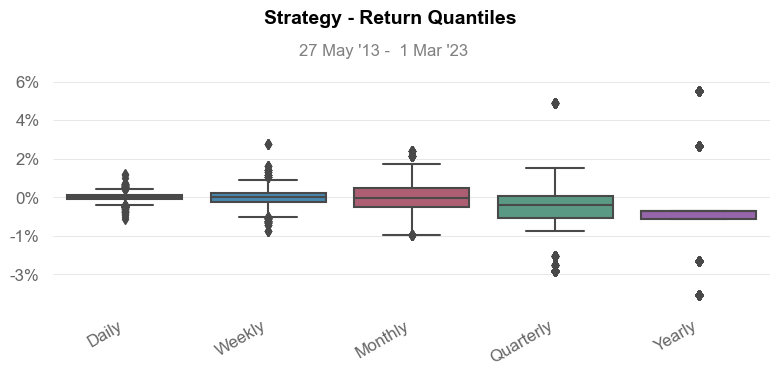

In [22]:
qs.reports.full(BRENTCMDUSD['D1']['Equity'].resample('D').last().dropna().pct_change(
), benchmark=benchmark['D1']['Equity'].resample('D').last().dropna().pct_change())

                           Benchmark    Strategy
-------------------------  -----------  ----------
Start Period               2011-02-21   2011-02-21
End Period                 2023-03-01   2023-03-01
Risk-Free Rate             0.0%         0.0%
Time in Market             100.0%       100.0%

Cumulative Return          4.15%        13.5%
CAGR﹪                     0.23%        0.73%

Sharpe                     0.15         0.43
Prob. Sharpe Ratio         71.58%       95.75%
Smart Sharpe               0.14         0.42
Sortino                    0.2          0.7
Smart Sortino              0.2          0.68
Sortino/√2                 0.14         0.5
Smart Sortino/√2           0.14         0.48
Omega                      1.11         1.11

Max Drawdown               -7.6%        -6.52%
Longest DD Days            3259         3467
Volatility (ann.)          1.98%        2.03%
R^2                        0.03         0.03
Information Ratio          0.01         0.01
Calmar                  

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2013-09-03,2021-02-25,2023-03-01,3467,-6.523235,-6.121167
2,2011-12-29,2012-02-28,2012-06-03,158,-2.260013,-2.075345
3,2011-06-28,2011-07-18,2011-08-08,42,-1.913117,-1.888371
4,2012-07-27,2012-11-29,2013-08-25,395,-1.904742,-1.716757
5,2011-05-24,2011-05-31,2011-06-12,20,-1.357275,-1.247383


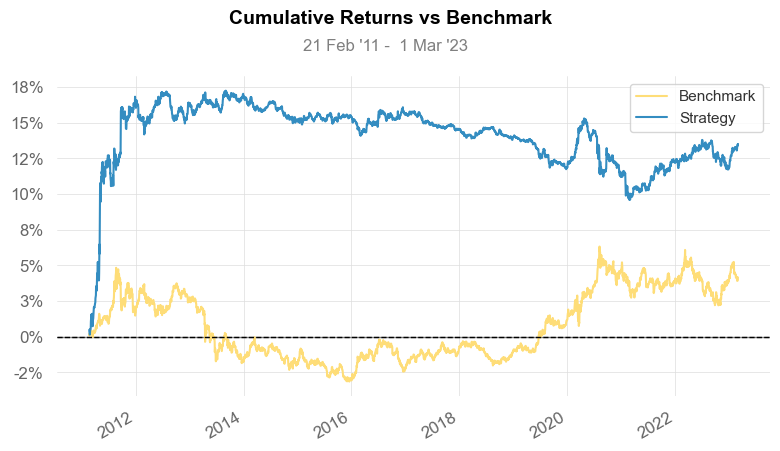

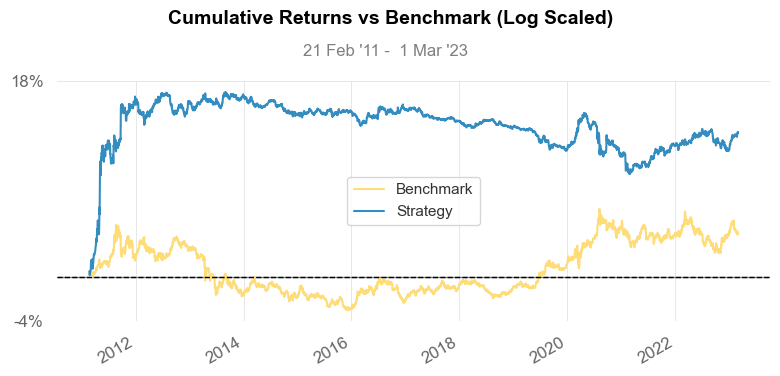

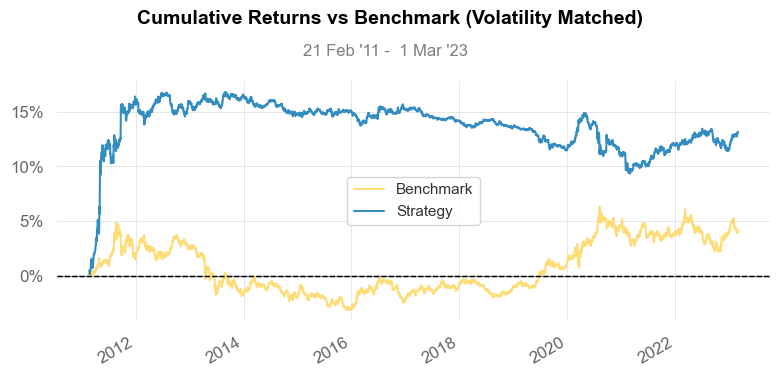

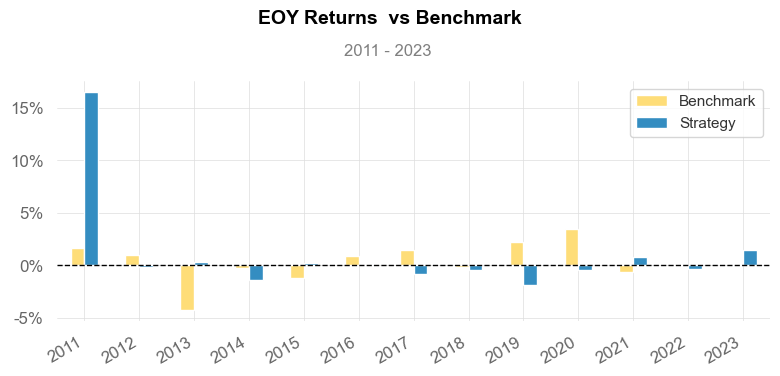

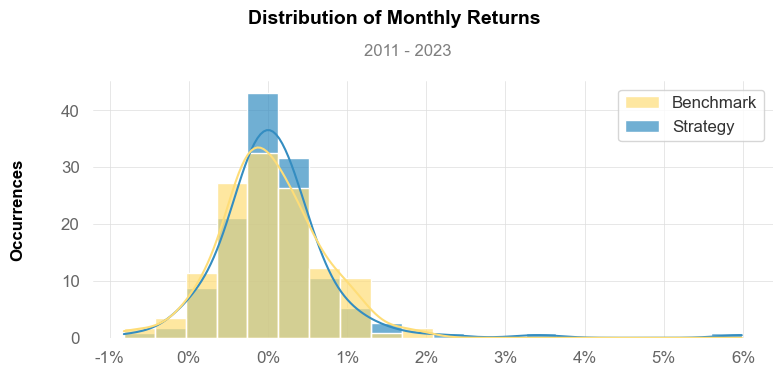

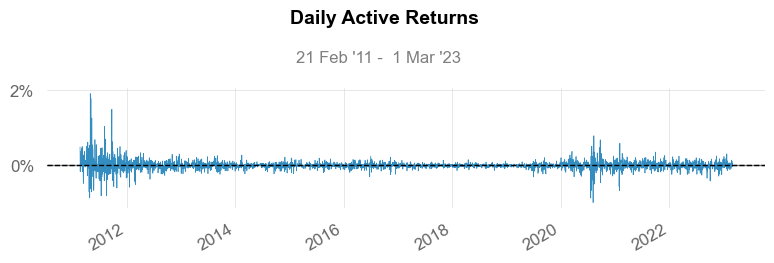

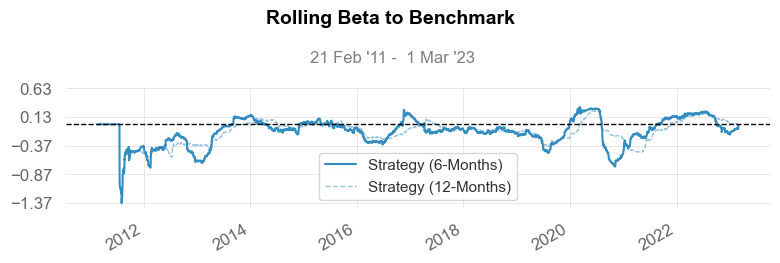

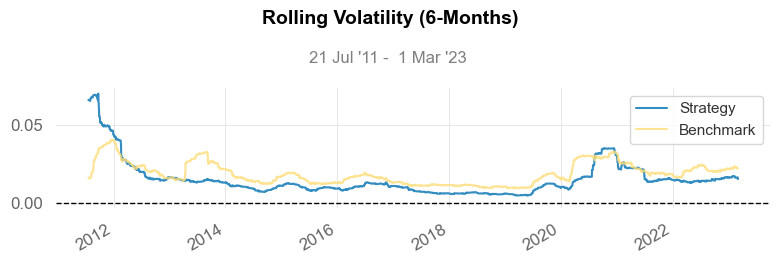

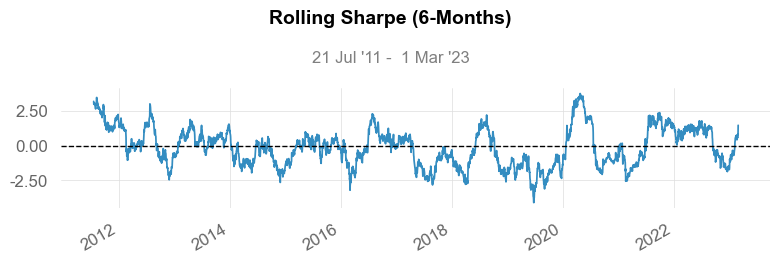

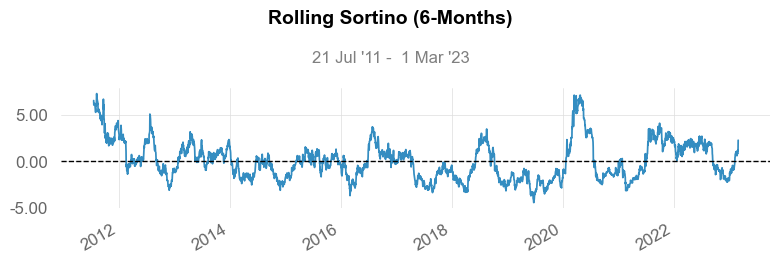

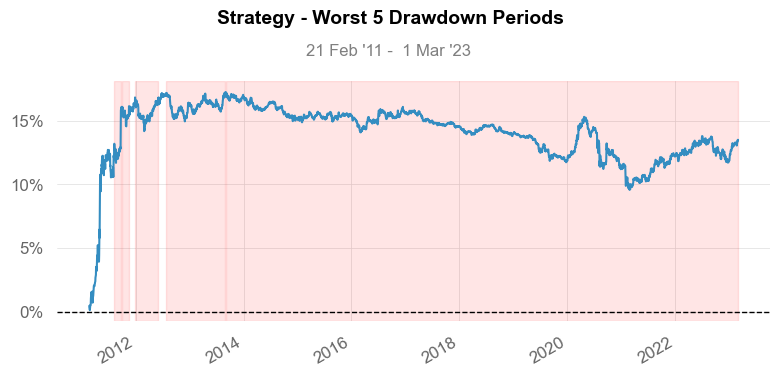

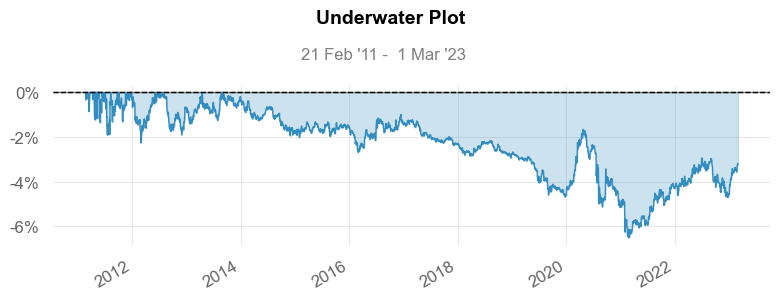

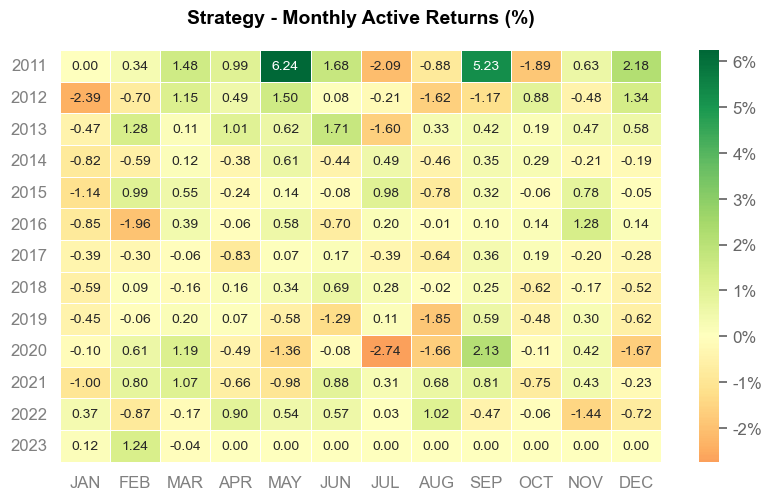

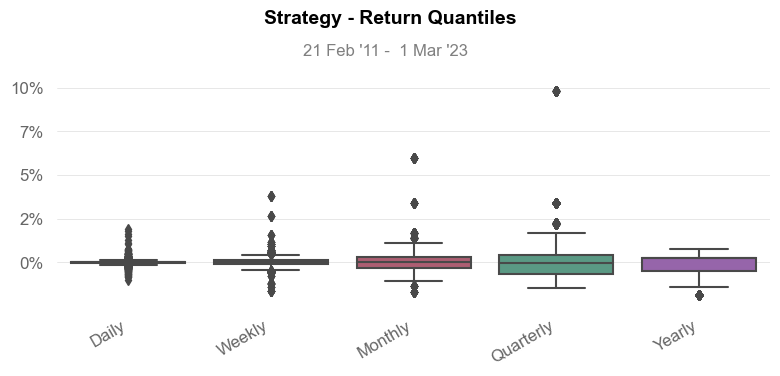

In [21]:
qs.reports.full(XAGUSD['D1']['Equity'].resample('D').last().dropna().pct_change() , benchmark=benchmark['D1']['Equity'].resample('D').last().dropna().pct_change())

In [18]:
TF = 'D1'

ValueError: x and y must have same first dimension, but have shapes (3735,) and (5043,)

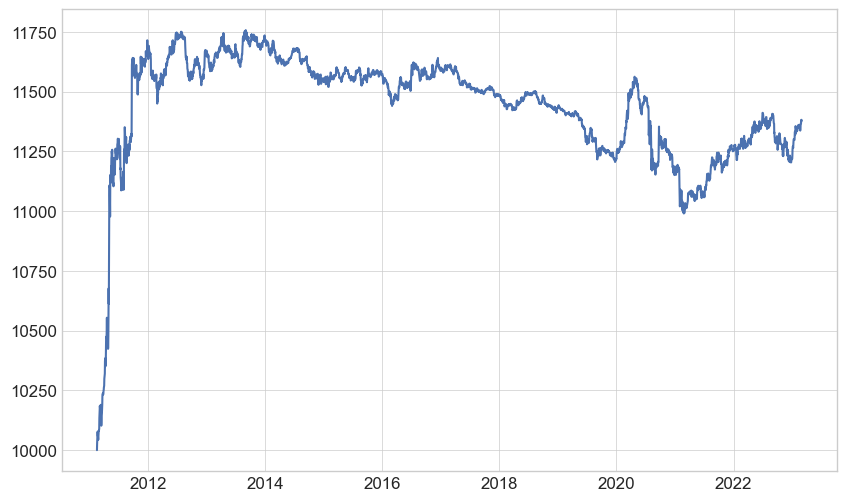

In [19]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    XAGUSD['D1'].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):
     


        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
          
            plt.plot(x, y, label=f'{data}',color='black', linewidth=2, zorder=20)

        elif data == 'XAUUSD_XAGUSD':

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H4

In [121]:
TF = 'H4'

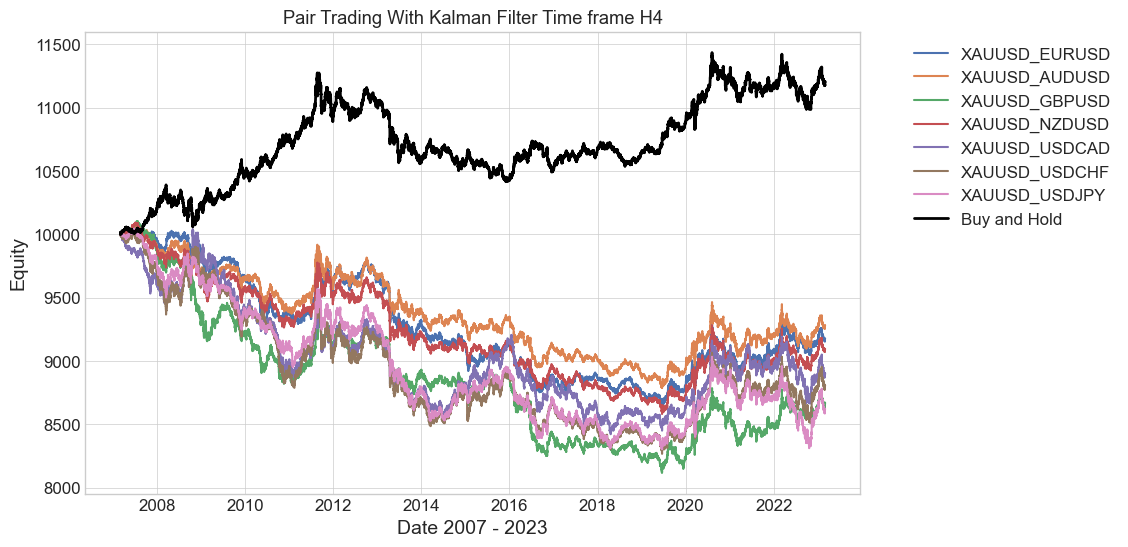

In [122]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD[TF].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
       
            plt.plot(x, y, label=f'{data}',color='black', linewidth=2, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF H1

In [123]:
TF = 'H1'

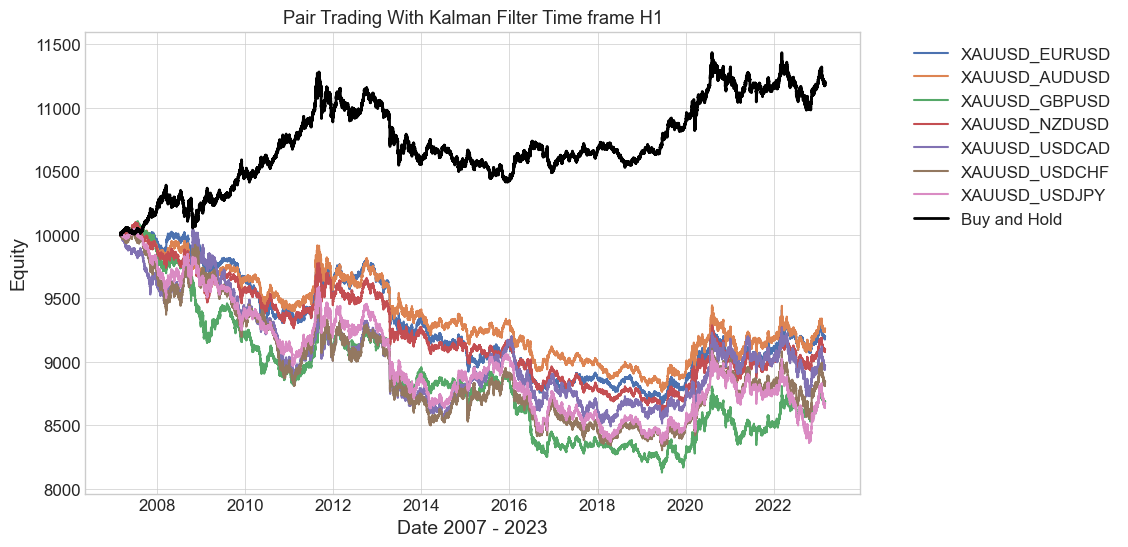

In [124]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD[TF].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
       
            plt.plot(x, y, label=f'{data}',color='black', linewidth=2, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### TF M30

In [125]:
TF = 'M30'

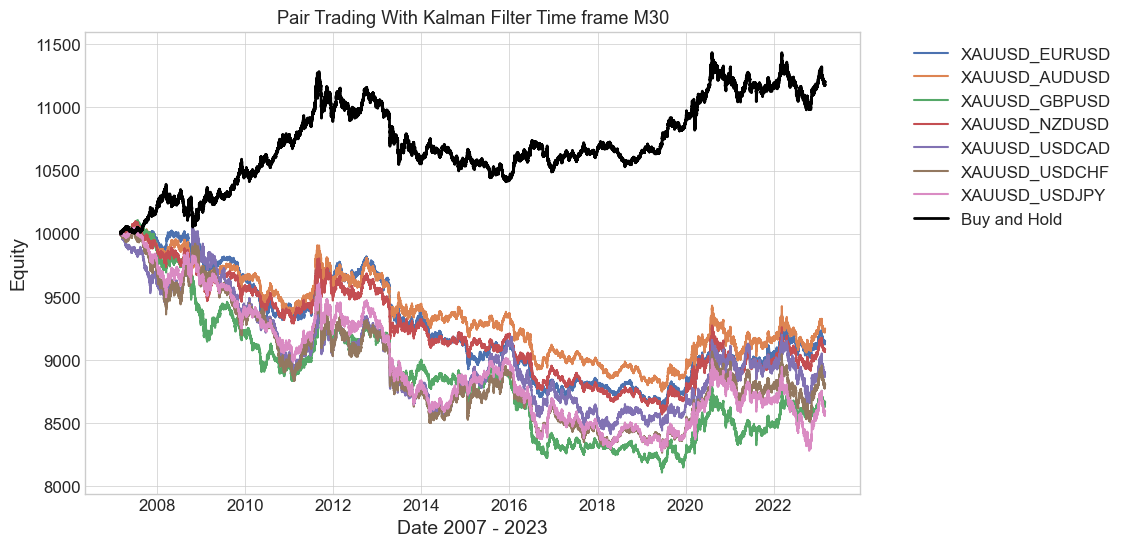

In [126]:
XAUUSD[TF] = XAUUSD[TF].reindex(
    AUDUSD[TF].index, method='ffill')  # fill forward
x = XAUUSD[TF].index  # Using the index directly without calling it


with plt.style.context('seaborn-v0_8-whitegrid'):

    for i, data in enumerate(strategy):

        y = strategy[f'{data}'][TF]['Equity']
   

        if data == 'Buy and Hold':
          
            plt.plot(x, y, label=f'{data}',color='black', linewidth=2, zorder=20)

        else:

            plt.plot(x, y, label=f'{data}')

    # Number of accent colors in the color scheme

    plt.title(f'Pair Trading With Kalman Filter Time frame {TF}')

    plt.xlabel('Date 2007 - 2023', fontsize=14)

    plt.ylabel('Equity', fontsize=14)

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()